# HW 1 - Question1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
league_df = pd.read_csv('HW1_data.csv')

1. We have  684 observations

In [41]:
league_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   league    684 non-null    object 
 1   year      684 non-null    int64  
 2   position  684 non-null    int64  
 3   team      684 non-null    object 
 4   matches   684 non-null    int64  
 5   wins      684 non-null    int64  
 6   draws     684 non-null    int64  
 7   loses     684 non-null    int64  
 8   scored    684 non-null    int64  
 9   conceded  681 non-null    float64
 10  pts       684 non-null    int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 58.9+ KB


### Categorical fields:
    - League
    - Team

### Numerical fields:
    - Year
    - Position
    - Matches
    - Wins
    - Draws
    - Loses
    - Scored
    - Conceded
    - Pts

In [42]:
league_df.dtypes

league       object
year          int64
position      int64
team         object
matches       int64
wins          int64
draws         int64
loses         int64
scored        int64
conceded    float64
pts           int64
dtype: object

- Number of League unique values: 6
- Number of Team unique values: 168

In [10]:
print("Number of league unique values:", league_df["league"].nunique(), "\n")

print("Number of Teams unique values:", league_df["team"].nunique())


Number of league unique values: 6 

Number of Teams unique values: 168
Numer of unique year in each column: [2014 2015 2016 2017 2018 2019]


#### The fields with null values are: 
- conceded:
    There are only 3 missing (null) values


In [44]:
league_df.head()

,league,year,position,team,matches,wins,draws,loses,scored,conceded,pts
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21.0,94
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38.0,92
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29.0,78
3,La_liga,2014,4,Valencia,38,22,11,5,70,32.0,77
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45.0,76


5. The number of teams in each league:
   - Bundesliga:    24
   - EPL:           30
   - La_liga:       30
   - Ligue_1:       29
   - RFPL:          25
   - Serie_A:       30

The minimum number of teams in a league is - 24 

In [45]:
teams_in_league = league_df.groupby("league")["team"].nunique()
print(teams_in_league, "\n")

print("The minimum number of teams in a league is", teams_in_league.min())

league
Bundesliga    24
EPL           30
La_liga       30
Ligue_1       29
RFPL          25
Serie_A       30
Name: team, dtype: int64 

The minimum number of teams in a league is 24


6. According to the graph, the more the team score, the higher is her rank (position)

C:\Users\ronic\AppData\Local\Temp\ipykernel_10952\1507017822.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_scored = league_df.groupby(["year", "team"]).mean()


year  team                   
2014  AC Milan                   56.0
      Almeria                    35.0
      Amkar                      25.0
      Arsenal                    71.0
      Arsenal Tula               20.0
                                 ... 
2019  Werder Bremen              42.0
      West Ham                   49.0
      Wolfsburg                  48.0
      Wolverhampton Wanderers    51.0
      Zenit St. Petersburg       65.0
Name: scored, Length: 684, dtype: float64

(1.0, 21.33177719825615)

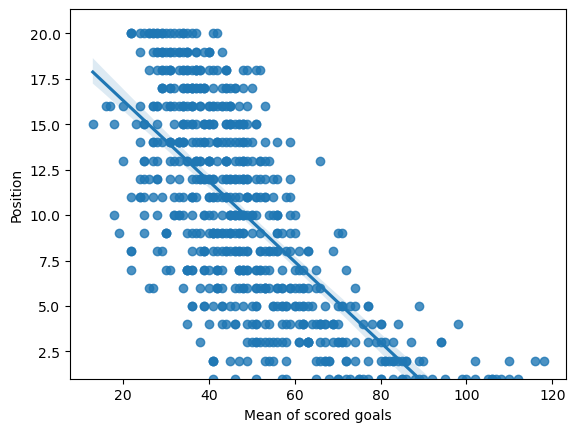

In [79]:
# the mean of scored goals for each team in each year
mean_scored = league_df.groupby(["year", "team"]).mean()
display(mean_scored["scored"])

# line plot of the mean of scored goals and position for each team in each year
# x label is the mean of scored goals
scord_position = sns.regplot(data=mean_scored, x="scored", y="position")
scord_position.set(xlabel="Mean of scored goals", ylabel="Position")
scord_position.set_ylim(bottom=1)


7. The league with the biggest gap between the higest median number of goal and the lowest one is Ligue_1 with the higest one in 2015 and lowest one in 2019

The league with the maximum difference is Ligue_1 with the value of 13.0 



idxmax    2015
idxmin    2019
Name: scored, dtype: int64

<Axes: xlabel='league'>

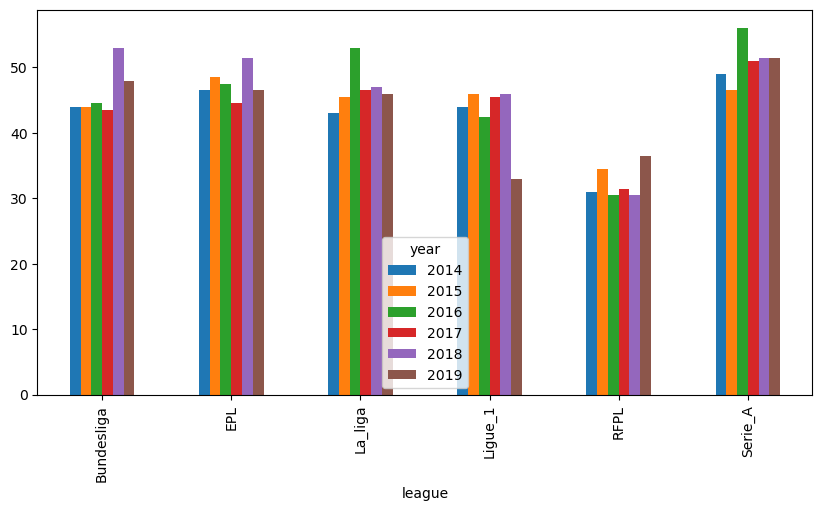

In [86]:
league_gb = league_df.groupby(['league', 'year'])['scored'].median()

#the difference between the maximum and minimum of median of scored goals for each league in each year
min_max = league_gb.unstack().apply(lambda x: x.max() - x.min(), axis=1)
# the league with the maximum difference and the name of the league
print("The league with the maximum difference is", min_max.idxmax(), "with the value of", min_max.max(), "\n")

# show the min and max of median of scored goals for ligue_1 in what yaer
display(league_gb.loc['Ligue_1'].agg(['idxmax', 'idxmin']))

# bar plot of the median of scored goals for each league in each year
league_gb.unstack().plot(kind='bar', figsize=(10, 5))

8. 
- There is only one mistake in the line 425 in the league Serie_A, for the team Crotone in 2017.
- In our opinion the mistake is from the pts column


In [87]:
def calculate_point(wins_col, draws_cols) :
    return (wins_col*3 + draws_cols*1)
    

league_df['calculate_point'] = league_df.apply(lambda x: calculate_point(x['wins'], x['draws']), axis = 1 )

comparaison = league_df['pts'] == league_df['calculate_point']

liste = []
for i in range(len(comparaison)) :
    if comparaison[i] == False : 
        liste.append(i)

league_df.iloc[liste]

,league,year,position,team,matches,wins,draws,loses,scored,conceded,pts,calculate_point
425,Serie_A,2017,18,Crotone,38,9,8,21,40,66.0,180,35


9.
- if we are locking for the league with the most chees teams all years combined, Serie_A is the one. 
- if we want to know which league was with the most chees teams in each years then we have : 

             .2014 : Serie_A
             .2015 : EPL
             .2016 : Serie_A
             .2017 : Serie_A
             .2018 : Serie_A
             .2019 : Ligue_1

In [88]:
#create a new df without the line with null values
new_league_df = league_df.dropna()

#creat a new column that indicate if the team is a chess one or no.  
new_league_df['chees_team'] = new_league_df['scored'] < new_league_df['conceded']


nb_chees_team_per_yer = league_df.groupby(['year','league'])['chees_team'].sum()
print(nb_chees_team_per_yer)

league_gb = league_df.groupby('league')['chees_team'].sum()
print(league_gb, '\n')


C:\Users\ronic\AppData\Local\Temp\ipykernel_10952\3966629485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_league_df['chees_team'] = new_league_df['scored'] < new_league_df['conceded']


KeyError: 'Column not found: chees_team'